In [1]:
import anndata as ad
import episcanpy as epi
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
epi.__version__
import time

DATADIR = '../../input/'
METADATADIR = '../../input/'
result_file = 'processed_all_buenrostro_bulk_peaks.h5ad'

# key parameters
nb_of_features = 120000
target_sum=None
min_cells =2
n_pcs =45
n_neighbors=15


# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')



# Load the raw count matrix + annotations/metadata

In [2]:
start = time.time()

In [3]:
adata = ad.read(DATADIR+'all_buenrostro_bulk_peaks.h5ad')
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'original_file_name', 'cell_name'

In [4]:
# load annotations and format cell names
adata.obs['original_cell_names'] = adata.obs_names.tolist()

# format cell_names
tmp_cell_names = []
for cell_names in adata.obs_names.tolist():
    cell_names = cell_names.split('/')[-1]
    cell_names = cell_names.rstrip('-0')
    cell_names = cell_names.rstrip('-1')
    cell_names = cell_names.rstrip('.dedup.st.bam')
    tmp_cell_names.append(cell_names)
adata.obs['cell_names'] = tmp_cell_names
adata.obs_names = tmp_cell_names

epi.pp.load_metadata(adata,
                     metadata_file='metadata.tsv',
                     path=METADATADIR,
                     separator='\t')
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'original_file_name', 'cell_name', 'original_cell_names', 'cell_names', 'label', 'cell_type'

In [5]:
set(adata.obs['cell_type'])

{'CLP', 'CMP', 'GMP', 'HSC', 'LMPP', 'MEP', 'MPP', 'UNK', 'mono', 'pDC'}

# Quality controls and Preliminary data processing

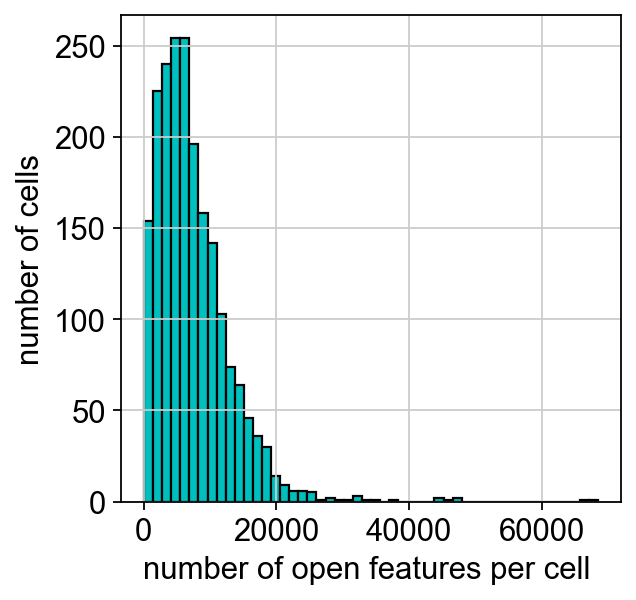

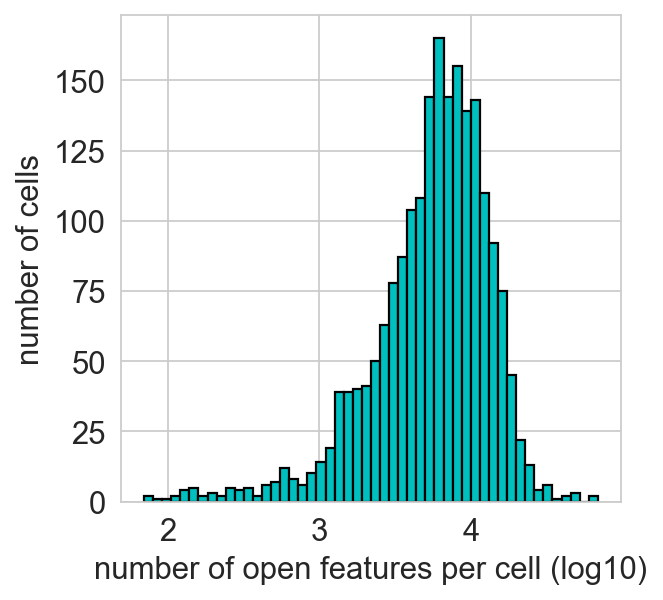

        Or use epi.pp.density_features.
    


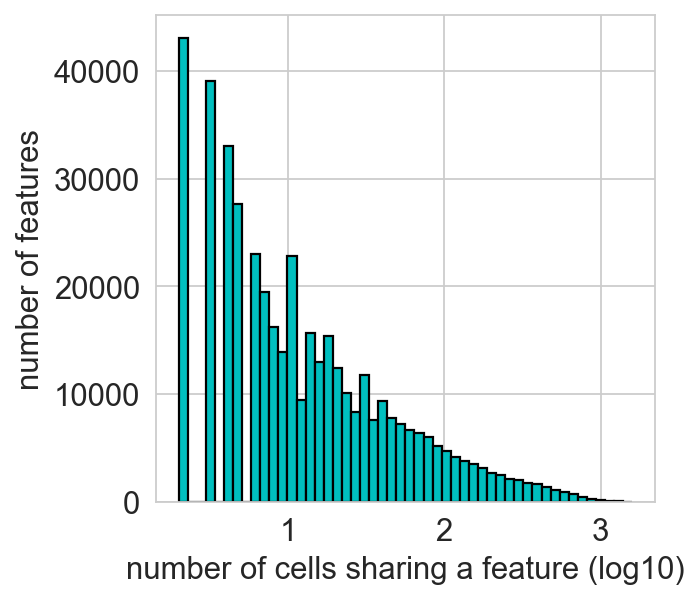

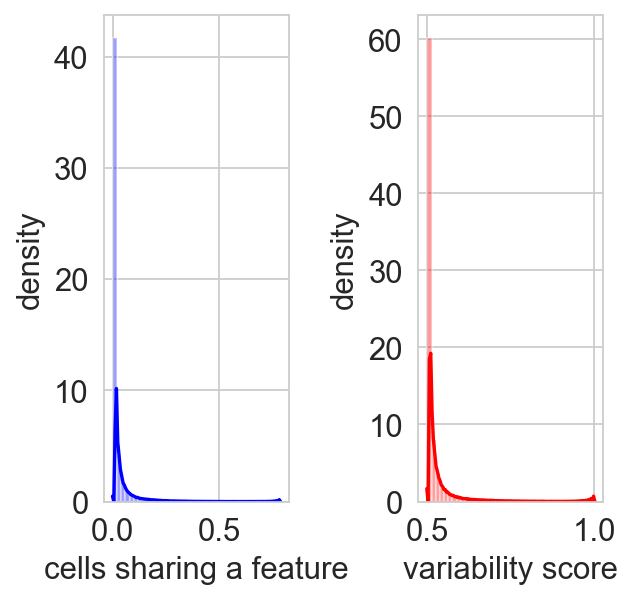

        Or use epi.pp.density_features.
    
Trying to set attribute `.var` of view, copying.


View of AnnData object with n_obs × n_vars = 2034 × 122707
    obs: 'batch', 'original_file_name', 'cell_name', 'original_cell_names', 'cell_names', 'label', 'cell_type', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'


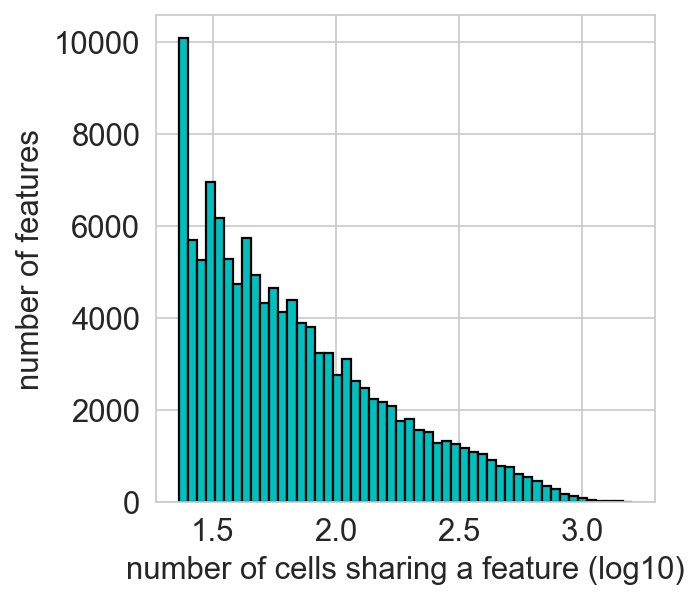

In [6]:
### remove empty cells and empty features
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=min_cells)

epi.pp.coverage_cells(adata, binary=True, log=False)
epi.pp.coverage_cells(adata, binary=True, log=True)

epi.pp.commonness_features(adata, binary=True, log=True)
adatareduced = epi.pp.select_var_feature(adata, nb_features=nb_of_features, copy=True)
print(adatareduced)

epi.pp.commonness_features(adatareduced, binary=True, log=True)

### Normalisation

        Or use epi.pp.density_features.
    


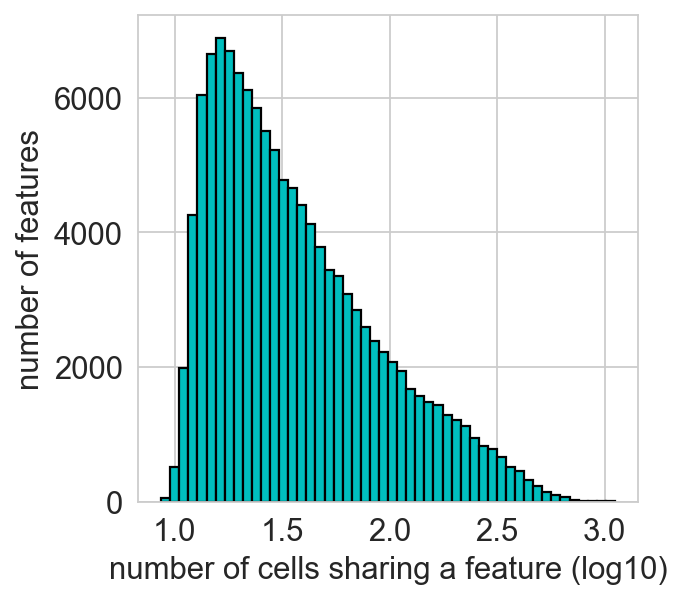

AnnData object with n_obs × n_vars = 2034 × 122707
    obs: 'batch', 'original_file_name', 'cell_name', 'original_cell_names', 'cell_names', 'label', 'cell_type', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p'

In [7]:
epi.pp.normalize_total(adatareduced)
epi.pp.log1p(adatareduced)

epi.pp.commonness_features(adatareduced, binary=True, log=True)
adatareduced

# Embedding

In [ ]:
epi.pp.pca(adatareduced, n_comps=100, svd_solver='arpack')
epi.pp.neighbors(adatareduced, n_pcs=n_pcs, n_neighbors=n_neighbors)
epi.tl.umap(adatareduced)
epi.tl.louvain(adatareduced)

# Visualisation

In [ ]:
sc.pl.pca(adatareduced, color=['cell_type', 'nb_features', 'louvain'], wspace=0.5)
sc.pl.umap(adatareduced, color=['cell_type', 'nb_features', 'louvain'], wspace=0.5)

In [ ]:
adatareduced.write(DATADIR+result_file)

In [ ]:
end = time.time()
print((end-start)/60.0)